In [1]:
import sys
import os

sys.path.append(os.path.abspath(".."))

from utils import (
    get_latest_experiments,
    aggregate_metrics,
    plot_all_metrics,
    plot_class_performances,
    plot_metric_comparison,
    permutation_test,
    plot_permutation_test_distribution,
    plot_permutation_anova_distribution,
    permutation_anova, 
    calculate_class_performance,
    plot_class_performance,
    plot_class_performance_comparison,
    METRIC_FILES
)

BASE_DIR = "../../local_experiments/retr_test_backone_norm_glomerulo"

In [2]:
# Specify a list of experiment folder names.
# Example usage:
#   - specific_experiments = []             -> process the latest experiment for each type.
#   - specific_experiments = ["exp1_folder"]  -> process only that experiment.
#   - specific_experiments = ["exp1_folder", "exp2_folder"] -> process multiple experiments.
specific_experiments = []  # Change as needed; empty list means "use latest per experiment type"

# Retrieve the experiments based on the provided filter.
latest_experiments = get_latest_experiments(BASE_DIR, specific_experiments)


File not found: ../../local_experiments/retr_test_backone_norm_glomerulo/phikon2_glomerulo_2025-05-26_15-58-41/map_at_k_results.json


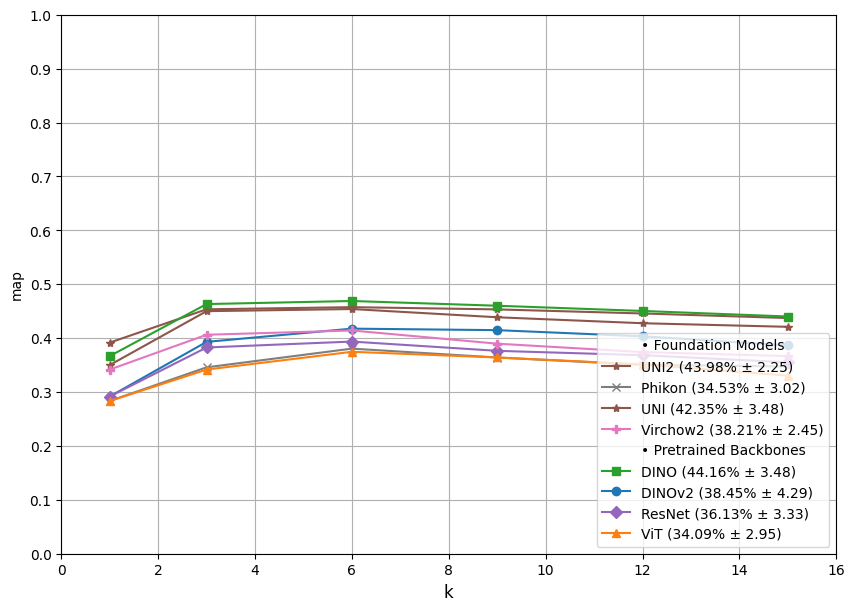

In [3]:
plot_metric_comparison("map", latest_experiments)
# Aumentar a letra "K"
# Top 10
# Applicar normalização nos embeddings
# usar apenas datasewt Glomerlo, Ovarian cance e skin cancer

In [18]:
exp1 = '../local_experiments/glomerulo/uni_fsl_glomerulo_2025-04-20_15-11-18/map_at_k_query_details.json'
exp2 = '../local_experiments/glomerulo/uni_glomerulo_2025-04-16_04-08-18/map_at_k_query_details.json'
performance = calculate_class_performance(exp1)
# plot_class_performance(performance, 'map')

# performance = calculate_class_performance()
# plot_class_performance(performance, 'map')

plot_class_performance_comparison(exp1, exp2, label1="Uni Few Shot Learning", label2="Uni Vit Embeddings", title="Map@k Performance Comparison per class")

File not found: ../local_experiments/glomerulo/uni_fsl_glomerulo_2025-04-20_15-11-18/map_at_k_query_details.json
File not found: ../local_experiments/glomerulo/uni_fsl_glomerulo_2025-04-20_15-11-18/map_at_k_query_details.json
File not found: ../local_experiments/glomerulo/uni_glomerulo_2025-04-16_04-08-18/map_at_k_query_details.json
Insufficient data to plot comparison.


In [19]:
performance

{}

In [20]:
res1 = calculate_class_performance(exp1)
res2 = calculate_class_performance(exp2)
for (cls, res), (cls2, res2 ) in zip(res1.items(), res2.items()):
    # print(i)
    print(f'FSL UNI total={res["total"]}, correct={res["correct"]}, erro={res["errors"]} {cls}')
    print(f'    UNI total={res2["total"]}, correct={res2["correct"]}, erro={res2["errors"]} {cls2}')
    print()

File not found: ../local_experiments/glomerulo/uni_fsl_glomerulo_2025-04-20_15-11-18/map_at_k_query_details.json
File not found: ../local_experiments/glomerulo/uni_glomerulo_2025-04-16_04-08-18/map_at_k_query_details.json


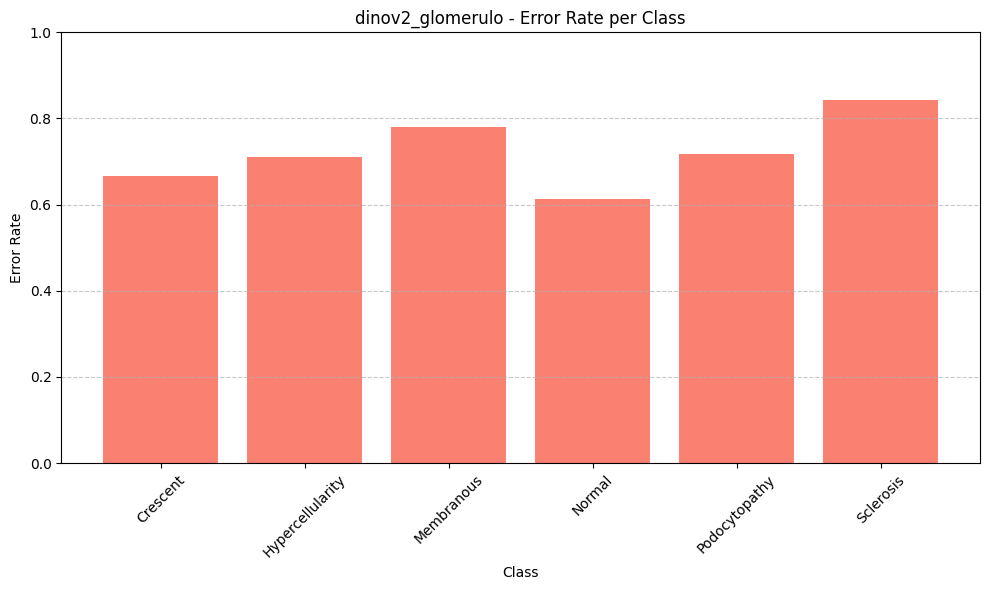

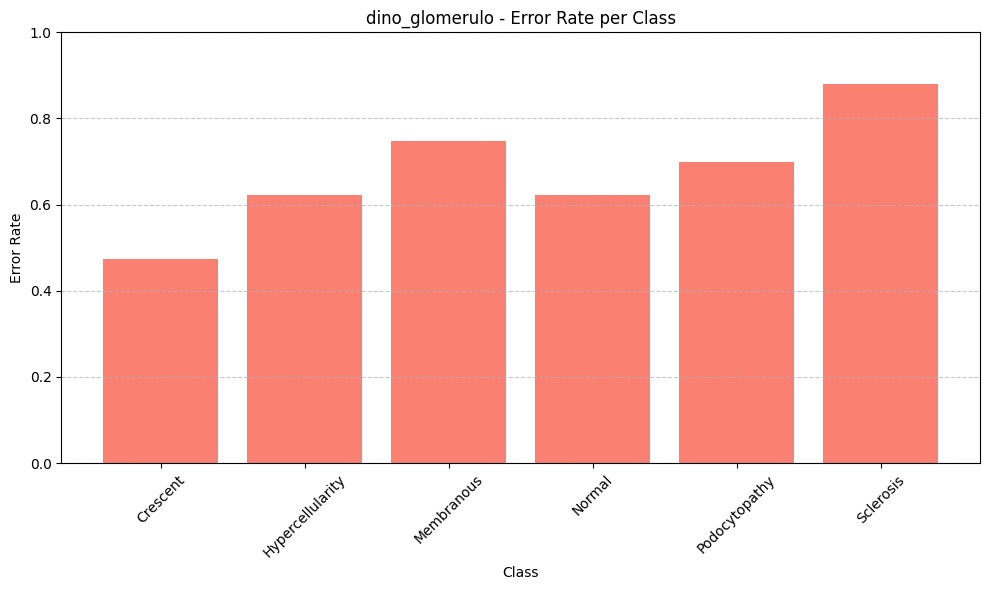

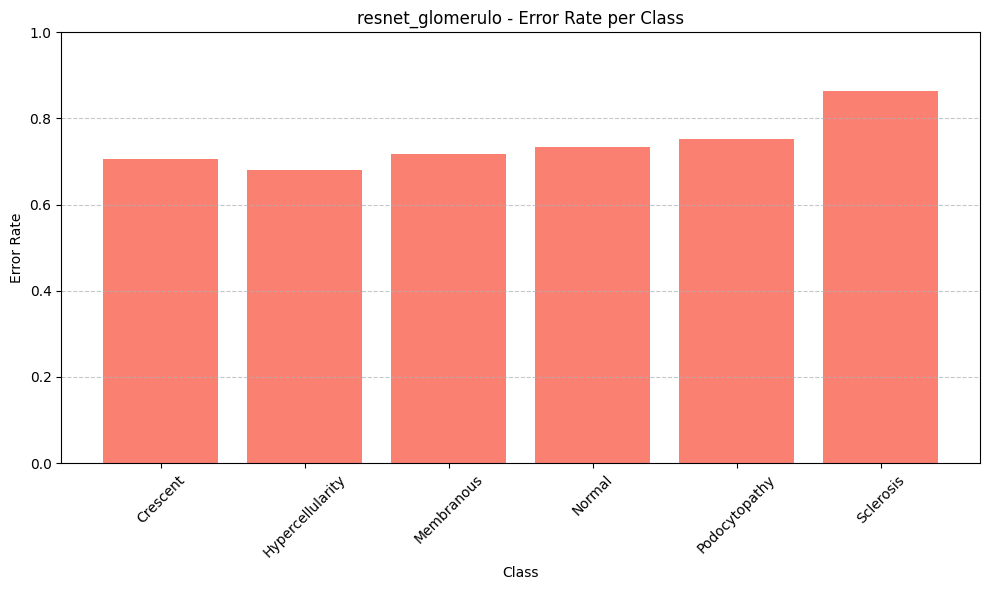

File not found: ../../local_experiments/retr_test_backone_glomerulo/UNI2-h_glomerulo_2025-05-25_22-59-11/map_at_k_query_details.json
No class statistics to plot.


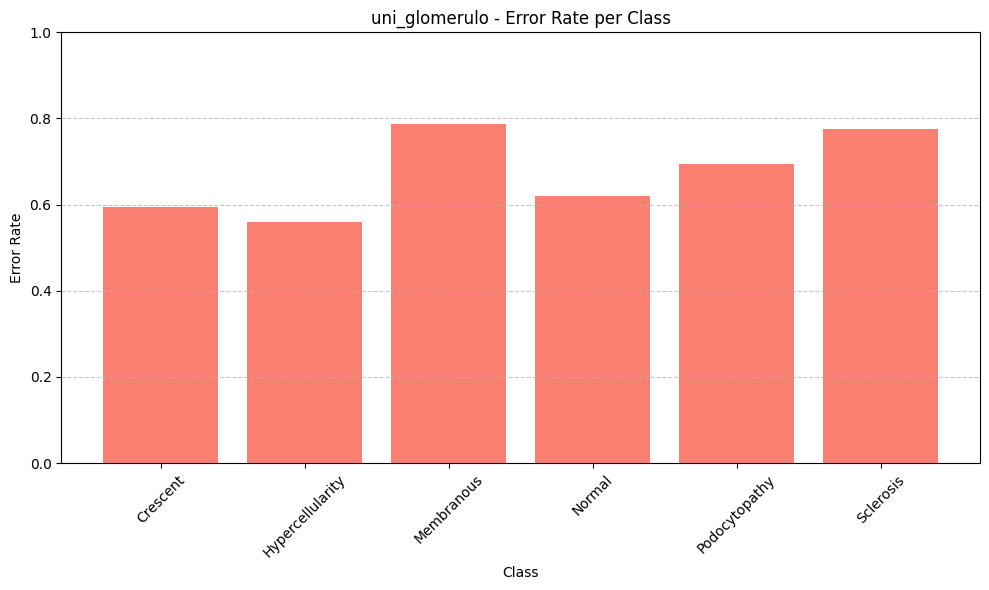

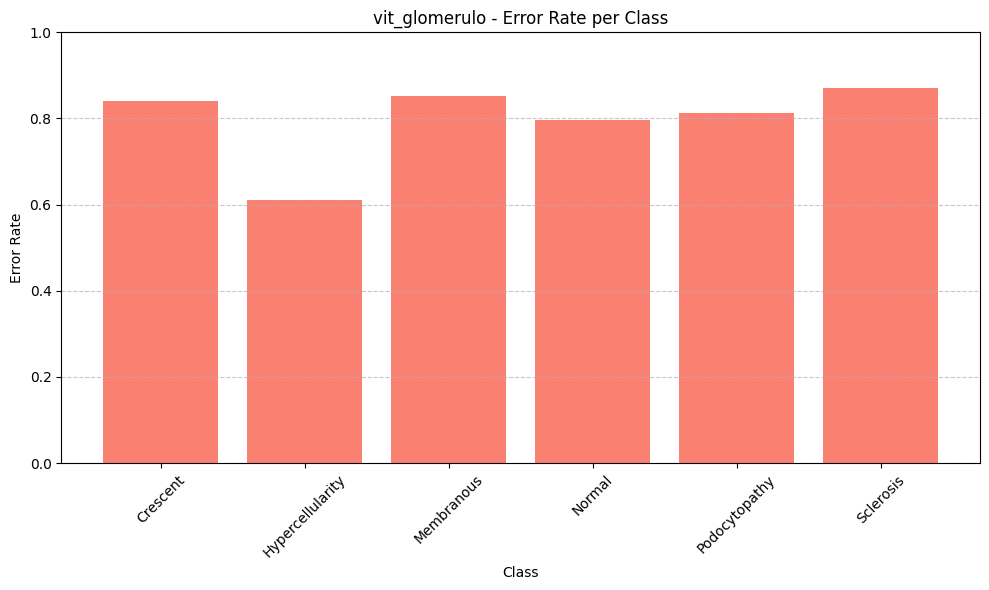

In [21]:
plot_class_performances(latest_experiments)

In [16]:

# Load map_at_k_query_details.json for each model in latest_experiments
models = {}
for model_name, model_info in latest_experiments.items():
    details_file = f"{model_info['path']}/{METRIC_FILES['map']['details']}"
    try:
        with open(details_file, "r") as f:
            models[model_name] = json.load(f)
    except:
        pass
# Dynamically assign models to variables for hypothesis testing
locals().update({f"model{i+1}": models[model_name] for i, model_name in enumerate(models.keys())})


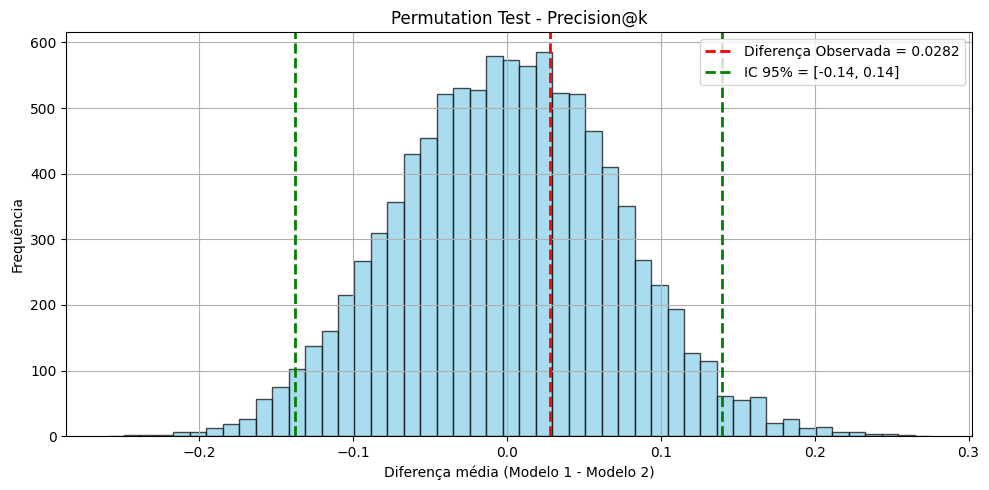

In [17]:
result = permutation_test(model1, model2, 95)
plot_permutation_test_distribution(result)

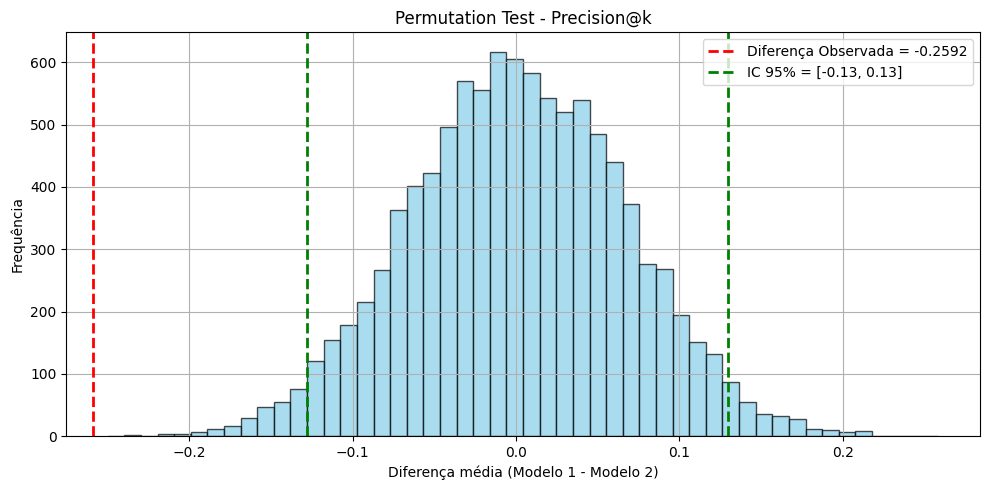

In [10]:
result = permutation_test(model1, model3, 95)
plot_permutation_test_distribution(result)

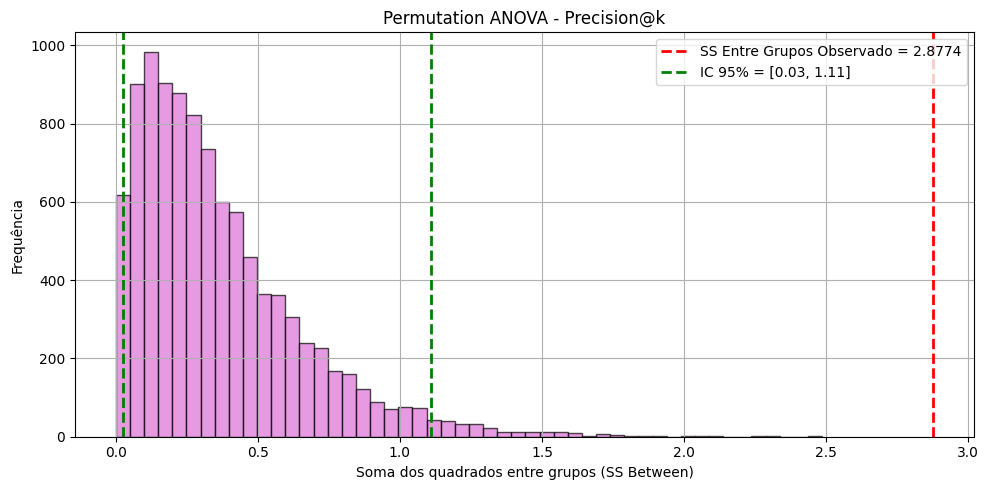

In [11]:
res = permutation_anova([model1, model2, model3, model4], n_permutations=10000, seed=42, confidence=95)
plot_permutation_anova_distribution(res)